<div style="width:100%;height:100px;text-align:center;border: 4px solid black;background-color:#E6BF00;color:white">

<header style="width:100%;height:100px;">
  <h1><b> Session 003</b></h1>
    <h4> Basic Natural language processing </h4>
</header>

<div> 

<div style='border: 4px solid #E6BF00;padding:9px;'>

By: Farhad Shadmand 
    
https://github.com/farhadsh1992
    
</div>

<div style="border: 4px solid #3550B7;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>



http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
  
https://towardsdatascience.com/using-scikit-learn-to-find-bullies-c47a1045d92f
    
https://www.kaggle.com/eswarbabu88/toxic-comment-glove-logistic-regression
    
https://www.kaggle.com/stacykurnikova/using-glove-embedding
    
https://www.kaggle.com/ankitswarnkar/word-embedding-using-glove-vector
    
https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python
    
https://markhneedham.com/blog/2018/05/19/interpreting-word2vec-glove-embeddings-sklearn-neo4j-graph-algorithms/
    
http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
    
https://radimrehurek.com/gensim/sklearn_api/w2vmodel.html
    
https://www.kaggle.com/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm
    
</div>

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Result of ML <h1>
</div>

In [28]:
# For dimonation = 50
df_re = pd.DataFrame(result)
df_re.sort_values('cross_validation_train').head(len(df_re))

,title,cross_validation_train,accuracy_test
2,XGBRegressor,-0.021116,0.484043
3,KNeighborsClassifier,0.506652,0.484043
6,LinearSVC,0.510195,0.480496
0,LogisticRegression,0.512417,0.478723
4,GaussianNB,0.513749,0.505319
1,ExtraTreesClassifier,0.516858,0.480496
5,DecisionTreeClassifier,0.517753,0.462766


In [30]:
df_re.to_json('result_of_Elmo_ML_Mytweets12.2.json')

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Load data <h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
#data_path = '/Users/apple/Documents/Programming/python/Project/data/Clean_tweets/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv'
data_path = '/Users/apple/Documents/Programming/pyfile/DataBase/project_data/Clean/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv'
df_data = pd.read_csv(data_path)
df_data = df_data.dropna()

def xx(x):
    if x==-1:
        return 0
    else:
        return x
#df_data['Price_label(0,1)'] = df_data['Price_label(0,1)'].apply(xx)
#df_data['text'] = df_data['clean_text'].apply(lambda x: re.sub('-PRON- ','',x))
#df_data['text'] = df_data['clean_text'].apply(lambda x: re.sub('-PRON-','',x))
#df_data = df_data.reindex()
df_data = df_data[['created_at','text','label']]
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 0 to 2815
Data columns (total 3 columns):
created_at    2816 non-null object
text          2816 non-null object
label         2816 non-null int64
dtypes: int64(1), object(2)
memory usage: 88.0+ KB


In [67]:
#df_data['label'] = df_data['Price_label(0,1)']

In [68]:
""" 
number = []
for num,text in enumerate(df_data.text):
    words = text.split(' ')
    if len(words)<=1:
        df_data.drop([num],axis=0)
        number.append(num)
df_data = df_data.reset_index()
"""

In [70]:
"""
%%time
for num,text in enumerate(df_data.text):
    words = text.split(' ')
    row = []
    for w in words:
        if len(w)>1:
            row.append(w)
    df_data.text[num] = ' '.join(row)
#df_data = df_data.reset_index()
"""

In [3]:
df_data.head(5)

,created_at,text,label
0,2010-06-29,trump tusk tesla,1
1,2010-06-29,tesla elon musk may trouble want hold contempt...,1
2,2010-07-01,year people find tesla teleportation achieve y...,0
3,2010-07-02,look mx efficient compare audi jaguar,0
4,2010-07-14,tesla musk risk contempt charge sec argue twee...,1


In [4]:
df_data.columns

Index(['created_at', 'text', 'label'], dtype='object')

In [10]:
df_data.groupby('label').sum()

,created_at,text
label,,
0,2010-07-012010-07-022010-07-222010-07-272010-0...,year people find tesla teleportation achieve y...
1,2010-06-292010-06-292010-07-142010-07-142010-0...,trump tusk teslatesla elon musk may trouble wa...


In [5]:
result = {}
result['title'] = []
result['cross_validation_train'] = []
result['accuracy_test'] = []

def result_maker(title,scoe,acc):
    result['title'].append(title)
    result['cross_validation_train'].append(scoe.mean())
    result['accuracy_test'].append(acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> ELMO <h1>
</div>

In [6]:
from farhad.Elmo_Thrones import ELMO_AWS

In [7]:
%%time
df = df_data.text
elmo = ELMO_AWS()
embed_data = elmo.Universal_Encoder(df,mode='dim50',kind='norm')

print(len(embed_data))
print(len(embed_data))

INFO:tensorflow:Using /var/folders/x3/r4c3zj896_55ywhdnh66wx0w0000gn/T/tfhub_modules to cache modules.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
a 50 dimensional vector as the sentence embedding.
2816
2816
CPU times: user 1.18 s, sys: 264 ms, total: 1.44 s
Wall time: 1.5 s


In [8]:
embed_data[1]

array([ 0.2783172 , -0.01503292,  0.01375373, -0.01811778, -0.04649745,
        0.15517274, -0.28379875,  0.08284412, -0.1412149 ,  0.04378505,
        0.18986207, -0.07488217,  0.1298998 , -0.1848547 , -0.09227709,
       -0.09121232,  0.27829084,  0.11050502,  0.05802172, -0.23626134,
       -0.14351173, -0.03364568,  0.27868304, -0.06414157, -0.2681666 ,
        0.0958973 , -0.21928649, -0.08112582,  0.13211125, -0.20039313,
        0.01610145,  0.10351509,  0.06651402,  0.02290783,  0.16076921,
       -0.18655886,  0.0226246 , -0.10860206, -0.0675513 , -0.0897296 ,
        0.3845458 ,  0.22980689,  0.1079257 , -0.06193075, -0.13920665,
        0.00291347, -0.06848463,  0.23519738,  0.45234737, -0.11584611],
      dtype=float32)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> Dimensional_Reduction <h1>
</div>

In [103]:
#from sklearn.decomposition import PCA

In [188]:
#pca_ = PCA(n_components=5)
#viz_data = pca_.fit_transform(data_vectorized.toarray()) 

In [2]:
#print('Lenght of data:',len(viz_data))
#print('Lenght of data:',len(viz_data[12]),len(viz_data[22]))

In [1]:
#viz_data[1]

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> model_selection <h1>
</div>

In [9]:
x = embed_data
y = [i for i in df_data['label']]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y ,test_size=0.20, random_state =32, shuffle=True)

print(y_train[1:10])
print(x_train[0])

[1, 0, 1, 1, 1, 1, 1, 1, 0]
[ 6.89549744e-01 -1.62198260e-01  6.79792538e-02  8.42216983e-02
  2.86323428e-01  1.70514598e-01 -1.95666656e-01  2.37419307e-01
 -3.44753444e-01  1.46607205e-01 -3.73069555e-01 -1.83128141e-04
  3.76636237e-02 -5.56422286e-02  2.02419534e-01  2.06329718e-01
  3.34249556e-01  2.40548346e-02 -5.53536750e-02  5.83230257e-02
 -4.00051326e-02  1.34037942e-01  1.55467287e-01 -8.25423524e-02
 -1.09924778e-01 -1.66045710e-01  1.00000724e-01  1.45712733e-01
 -1.56621248e-01  1.57654747e-01  1.52250662e-01  1.64236292e-01
 -1.95847884e-01  1.64799958e-01  2.04318941e-01 -2.24508673e-01
  5.64232394e-02 -7.44004697e-02 -1.85391009e-01  8.96181464e-02
 -9.52342376e-02 -1.27098233e-01  3.46657336e-02 -3.49010676e-01
 -1.47957385e-01 -5.93805760e-02  2.78414264e-02 -6.19671382e-02
  7.54950568e-02  4.14337777e-02]


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LogisticRegression <h1>
</div>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, log_loss, f1_score,mean_squared_error
from farhad_DL.utility import plot_confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score

accuracy: 0.5124168514412417
accuracy: 0.4787234042553192


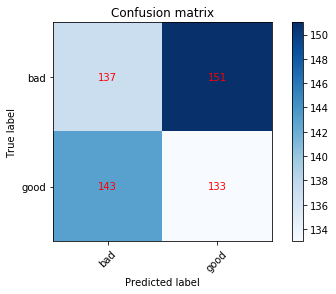

In [12]:
classifier = LogisticRegression(solver='sag')

scoe = cross_val_score(classifier,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [13]:
title = 'LogisticRegression'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> ExtraTreesClassifier <h1>
</div>

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

accuracy: 0.5168583394924858
accuracy: 0.4804964539007092


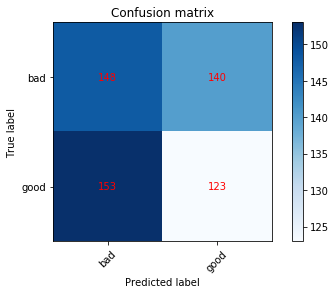

In [15]:
ETC = ExtraTreesClassifier(n_estimators=200)

scoe = cross_val_score(ETC,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


ETC.fit(x_train, y_train)
y_pred = ETC.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [16]:
title = 'ExtraTreesClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> XGBRegressor <h1>
</div>

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

accuracy: -0.021115685091550217
accuracy: 0.48404255319148937


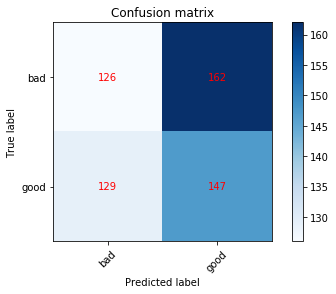

In [18]:
from xgboost import XGBRegressor

model_xgb_Regressor = XGBRegressor(n_estimators=60,early_stopping_rounds='auto',verbose=True,random_state=10)

scoe = cross_val_score(model_xgb_Regressor,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_xgb_Regressor.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [19]:
title = 'XGBRegressor'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> KNeighborsClassifier <h1>
</div>

accuracy: 0.5066518847006651
accuracy: 0.48404255319148937


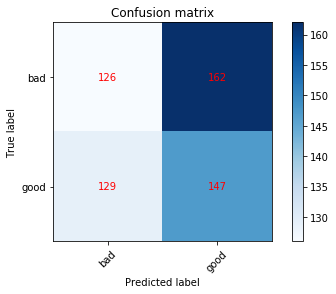

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kmean = KNeighborsClassifier()
scoe = cross_val_score(kmean, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

kmean.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [21]:
title = 'KNeighborsClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> GaussianNB <h1>
</div>

accuracy: 0.5137491993101749
accuracy: 0.5053191489361702


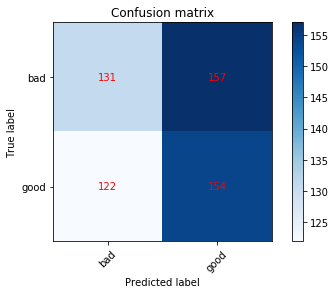

In [22]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
scoe = cross_val_score(GNB, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

GNB.fit(x_train, y_train)
y_pred = GNB.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [23]:
title = ' GaussianNB'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> DecisionTreeClassifier <h1>
</div>

accuracy: 0.5177531411677754
accuracy: 0.4627659574468085


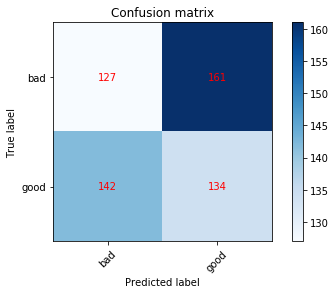

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(max_leaf_nodes=300)
scoe = cross_val_score(model_DecisionTree, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_DecisionTree.fit(x_train, y_train)
y_pred = model_DecisionTree.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [25]:
title = 'DecisionTreeClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LinearSVC <h1>
</div>

accuracy: 0.5101946292190195
accuracy: 0.4804964539007092


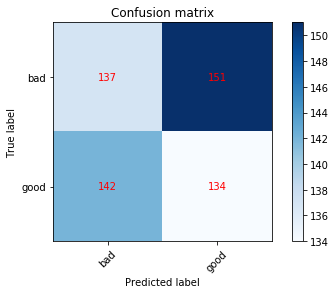

In [26]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

scoe = cross_val_score(LSVC, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

LSVC.fit(x_train, y_train)
y_pred = LSVC.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [27]:
title = ' LinearSVC'
result_maker(title,scoe,acc)